# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [84]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [86]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [14]:
# Create a Beautiful Soup Object
html = browser.html
mars_weather_soup = soup(html, 'html.parser')

In [22]:
# Extract all rows of data
table = mars_weather_soup.find('table')
rows = table.find_all('tr')

# Validate column headings by printing table as text and looking at 7 headers)
# print(table.text)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skipping the header row
    cols = row.find_all('td')
    row_data = [col.text.strip() for col in cols]
    mars_weather_data.append(row_data)

In [27]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_weather_df = pd.DataFrame(mars_weather_data, columns=column_names)

In [28]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [42]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int64')
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int64')
mars_weather_df['month'] = mars_weather_df['month'].astype('int64')
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [74]:
months_on_mars = mars_weather_df['month'].value_counts().sort_index()
months_on_mars_count = len(months_on_mars)
print(months_on_mars)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [75]:
# 1. How many months are there on Mars?
print(months_on_mars_count)
print("there are:", months_on_mars_count, "months on mars")

12
there are: 12 months on mars


In [125]:
# 2. How many Martian days' worth of data are there?
martian_days = len(mars_weather_df)
print("There are", martian_days,"Martian days' worth of data")

There are 1867 Martian days' worth of data


In [80]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(average_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


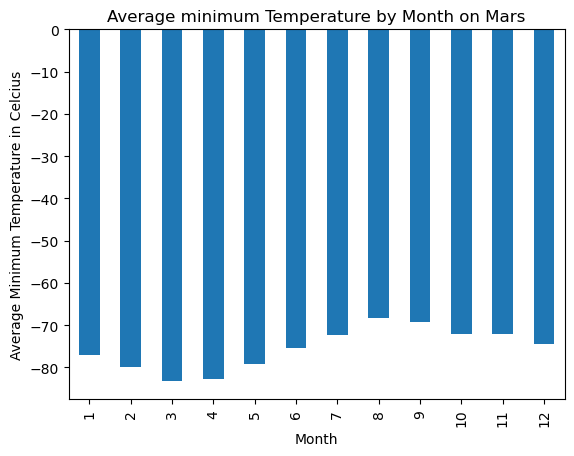

In [83]:
# Plot the average temperature by month
average_low_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Minimum Temperature in Celcius')
plt.title('Average minimum Temperature by Month on Mars')
plt.show()


The coldest month in Curiosity's location is month 3
The hottest month in Curiosity's location is month 8


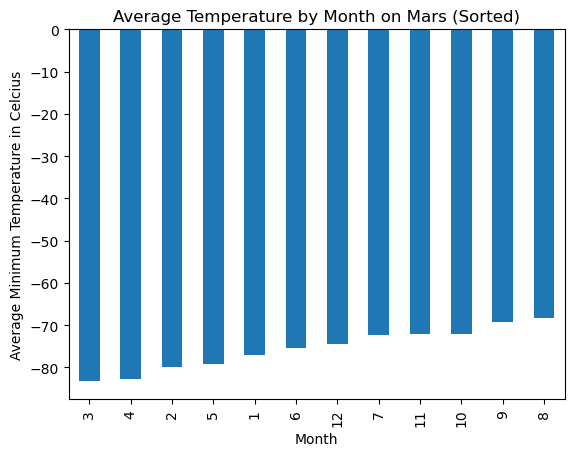

In [96]:
# Identify the coldest and hottest months in Curiosity's location
# in other words, order months based on temperature ascending from cold to warm

coldest_month = average_low_temp_by_month.idxmin()
hottest_month = average_low_temp_by_month.idxmax()

# Print the results
print("The coldest month in Curiosity's location is month", coldest_month)
print("The hottest month in Curiosity's location is month", hottest_month)

sorted_average_temp_by_month = average_low_temp_by_month.sort_values()

# Plot the average temperature by month with sorted x-axis data points
sorted_average_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Minimum Temperature in Celcius')
plt.title('Average Temperature by Month on Mars (Sorted)')

plt.show()

In [97]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

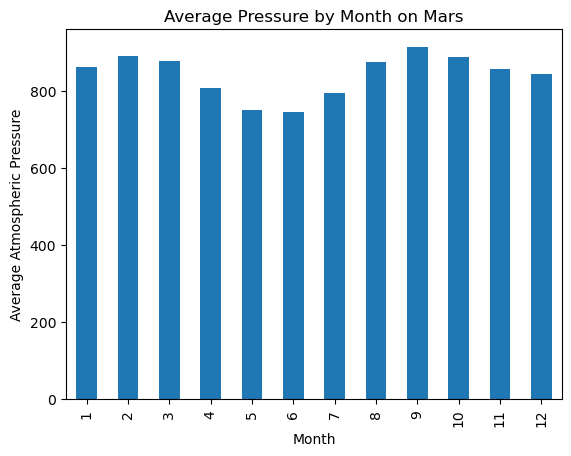

In [98]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Atmospheric Pressure')
plt.title('Average Pressure by Month on Mars')
plt.show()

Text(0, 0.5, 'Minimum Temperature')

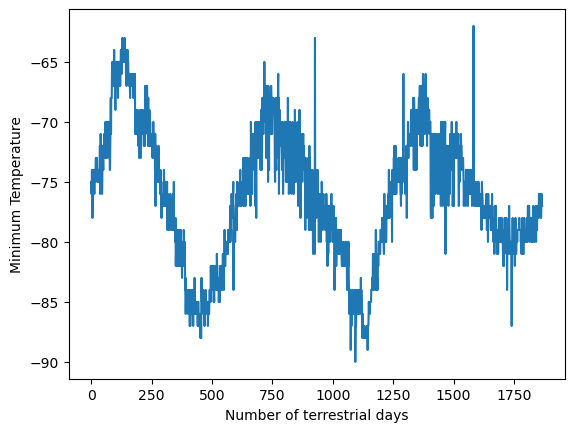

In [109]:
# Find the difference between the maximum and minimum dates in the terrestrial_date column
plt.plot(range(0, len(mars_weather_df)), mars_weather_df["min_temp"].values)
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum Temperature")

In [120]:
# 5. How many terrestrial (earth) days are there in a Martian year?
import numpy as np

# Assuming you have your plot data stored in x_values and y_values
x_values = range(0, len(mars_weather_df))  # Your x-values (number of terrestrial days)
y_values = mars_weather_df["min_temp"].values # Your y-values (minimum temperatures)

import numpy as np

# Assuming you have your y-values stored in a list y_values
# y_values = [value1, value2, ...]

# Define the desired y-value
desired_y_value = -65

# Create an empty list to store corresponding x-values
corresponding_x_values = []

# Find the indices where the y-value equals the desired value
indices = np.where(y_values == desired_y_value)[0]

# Append the corresponding x-values for the desired y-value to the list
for idx in indices:
    corresponding_x_value = x_values[idx]
    corresponding_x_values.append(corresponding_x_value)

# Print the list of corresponding x-values
# print("Corresponding x-values for y =", desired_y_value, "are:", corresponding_x_values)

# Calculate the difference between the maximum and minimum values in the list
difference = max(corresponding_x_values) - min(corresponding_x_values)

# Print the difference
print("The difference between the maximum and minimum values is:", difference)

The difference between the maximum and minimum values is: 630


In [122]:
# Validation
# verify that my solution (630) is aligned with the solution's solution (675) and the internet's solution (687)
my_solution_year_on_mars_in_terrestrial_days = difference
solutions_solution_year_on_mars_in_terrestrial_days = 675
internets_solution_year_on_mars_in_terrestrial_days = 687
print("my solution for year on mars in terrestrial days is:", difference)
print("The solution's solution for year on mars in terrestrial days is:", solutions_solution_year_on_mars_in_terrestrial_days)
print("The internet's solution for year on mars in terrestrial days is:", internets_solution_year_on_mars_in_terrestrial_days)

# verify accuracy of my estimation
percent_error = ((solutions_solution_year_on_mars_in_terrestrial_days - my_solution_year_on_mars_in_terrestrial_days)/solutions_solution_year_on_mars_in_terrestrial_days)*100
print("percent_error:", percent_error)

my solution for year on mars in terrestrial days is: 630
The solution's solution for year on mars in terrestrial days is: 675
The internet's solution for year on mars in terrestrial days is: 687
percent_error: 6.666666666666667


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [123]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [124]:
browser.quit()